In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# conversion factor
area_2km_pixel = (2193 * 1000) * (2193 * 1000)  # unit in mm2

# area of basins
gmd4_area = 12737667189.642 * (1000 * 1000) # in mm2  
gmd3_area = 21820149683.491 * (1000 * 1000) # in mm2  
rpb_area = 22753400088.854 * (1000 * 1000) # in mm2  
hqr_area = 1982641859.510 * (1000 * 1000) # in mm2 
doug_area = 1437337304.796 * (1000 * 1000) # in mm2 

# model version = V8

# GMD4, Kansas

In [3]:
gmd4_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD4_KS/KS_GMD4_netGW_pumping.csv')
gmd4_df.head()

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,0.000000,0.0,0.0,39.871724,-102.045921,0.000000
1,2016,51.708374,0.0,0.0,39.871724,-102.026158,201.607098
2,2016,17.169529,0.0,0.0,39.871724,-102.006395,66.942714
3,2016,10.569081,0.0,0.0,39.871724,-101.986633,41.208061
4,2016,3.262337,0.0,0.0,39.871724,-101.966870,12.719608


## For all years

In [4]:
# yearly df
yearly_df = gmd4_df.groupby('year').sum()
yearly_df = yearly_df.reset_index()
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,136149.043875,93701.380732,365334.340315,135526.76618,-347601.471437,530834.978178
1,2017,112152.934520,75174.115469,293097.985804,135526.76618,-347601.471437,437275.935371
2,2018,118852.997090,70638.717582,275414.825138,135526.76618,-347601.471437,463398.980127
3,2019,135178.165539,61022.525994,237922.047978,135526.76618,-347601.471437,527049.595738
4,2020,178091.737771,100520.496194,391921.537903,135526.76618,-347601.471437,694366.416866


R2:  -0.1717387403081283
RMSE:  40.30866105668737


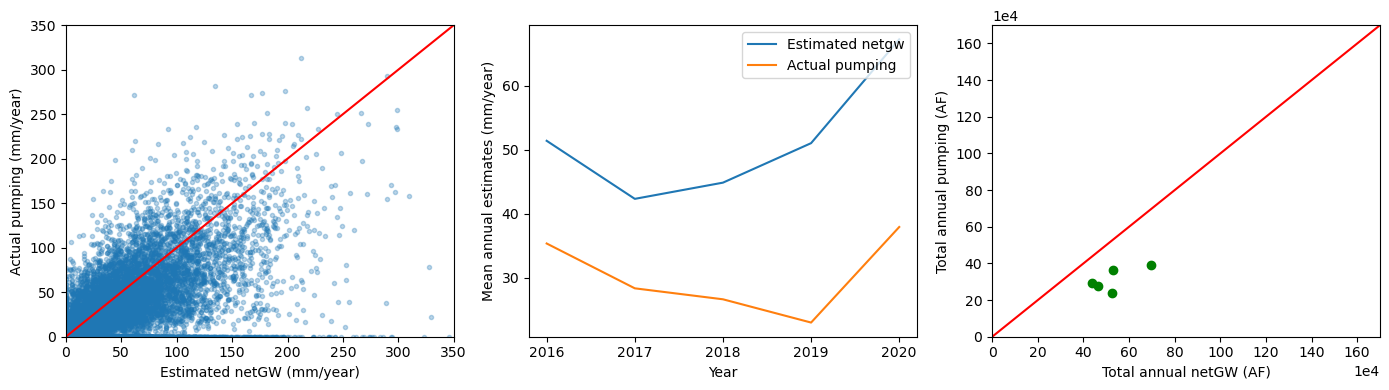

In [5]:
r2 = r2_score(gmd4_df.pumping_mm, gmd4_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(gmd4_df.pumping_mm, gmd4_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# scatter plot
ax[0].scatter(gmd4_df.netGW_mm, gmd4_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 350)
ax[0].set_ylim(0, 350)

# annual mean in mm/year 
ax[1].plot(yearly_df.year, (yearly_df.netGW_mm * area_2km_pixel/gmd4_area), label='Estimated netgw')
ax[1].plot(yearly_df.year, (yearly_df.pumping_mm * area_2km_pixel/gmd4_area), label='Actual pumping')
ax[1].set_xticks(yearly_df.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper right')

# annual sum in AF 
ax[2].scatter(yearly_df.netGW_AF, yearly_df.pumping_AF, color='g')
ax[2].plot([0, 1], [0, 1], '-r', transform=ax[2].transAxes)
ax[2].set_ylabel('Total annual pumping (AF)')
ax[2].set_xlabel('Total annual netGW (AF)')
ax[2].set_xlim(0, 1700000)
ax[2].set_ylim(0, 1700000)
ax[2].ticklabel_format(style='sci', scilimits=(4, 4))

plt.tight_layout()

-------------------

# GMD3, Kansas

In [6]:
gmd3_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD3_KS/KS_GMD3_netGW_pumping.csv')
gmd3_df.head()

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,206.868070,0.000000,0.0,38.251163,-101.097300,806.563202
1,2016,146.708660,0.000000,0.0,38.251163,-101.077537,572.006150
2,2016,60.294530,0.000000,0.0,38.251163,-101.057775,235.083876
3,2016,251.067840,0.000000,0.0,38.251163,-101.038012,978.894804
4,2016,35.083984,43.345318,169.0,38.251163,-101.018249,136.789841


In [7]:
# yearly df
yearly_df = gmd3_df.groupby('year').sum()
yearly_df = yearly_df.reset_index()
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,370283.546016,385433.239137,1.502774e+06,213089.285003,-572382.588574,1.443708e+06
1,2017,308071.675019,354127.353574,1.380715e+06,213089.285003,-572382.588574,1.201149e+06
2,2018,333454.408916,375142.974710,1.462653e+06,213089.285003,-572382.588574,1.300114e+06
3,2019,367613.824038,342817.318083,1.336618e+06,213089.285003,-572382.588574,1.433299e+06
4,2020,435430.360991,422209.311496,1.646161e+06,213089.285003,-572382.588574,1.697711e+06


R2:  0.4998317762110055
RMSE:  64.36983741196876


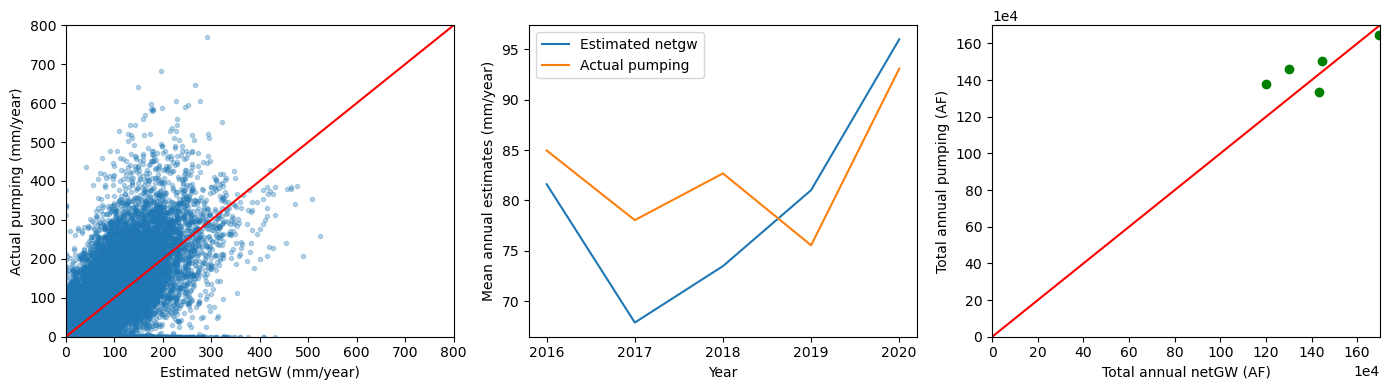

In [8]:
r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# scatter plot
ax[0].scatter(gmd3_df.netGW_mm, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean in mm/year 
ax[1].plot(yearly_df.year, (yearly_df.netGW_mm * area_2km_pixel/gmd3_area), label='Estimated netgw')
ax[1].plot(yearly_df.year, (yearly_df.pumping_mm * area_2km_pixel/gmd3_area), label='Actual pumping')
ax[1].set_xticks(yearly_df.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

# annual sum in AF 
ax[2].scatter(yearly_df.netGW_AF, yearly_df.pumping_AF, color='g')
ax[2].plot([0, 1], [0, 1], '-r', transform=ax[2].transAxes)
ax[2].set_ylabel('Total annual pumping (AF)')
ax[2].set_xlabel('Total annual netGW (AF)')
ax[2].set_xlim(0, 1700000)
ax[2].set_ylim(0, 1700000)
ax[2].ticklabel_format(style='sci', scilimits=(4, 4))

plt.tight_layout()

## netGW conversion to pumping

R2:  0.4352852515175706
RMSE:  70.09564430888045


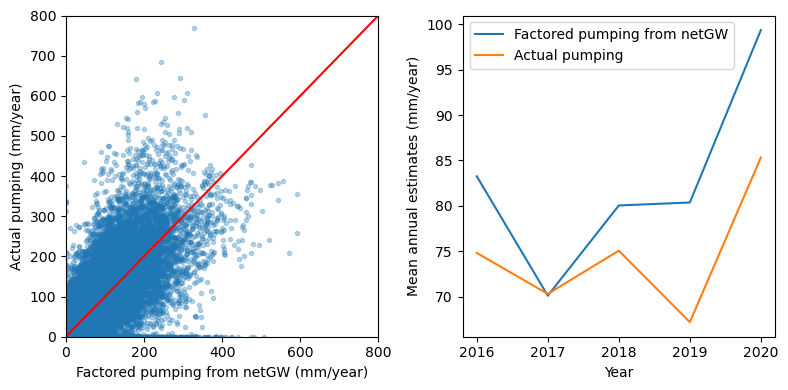

In [17]:
gmd3_df['factored_pumping'] = gmd3_df['netGW_mm'] /0.85

r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.factored_pumping)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.factored_pumping, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd3_df.factored_pumping, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Factored pumping from netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean in mm/year
yearly_mean = gmd3_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.factored_pumping, label='Factored pumping from netGW')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

# RPB, Colorado

In [9]:
rpb_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/RPB_CO/CO_RPB_netGW_pumping.csv')
rpb_df.head()

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,0.000000,0.000000,0.000,40.958685,-102.085447,0.000000
1,2016,68.957630,0.000000,0.000,40.958685,-102.065684,268.860647
2,2016,16.591164,0.000000,0.000,40.938922,-102.144736,64.687711
3,2016,29.857227,24.034082,93.707,40.938922,-102.124973,116.411105
4,2016,0.000000,0.000000,0.000,40.938922,-102.105210,0.000000


In [10]:
# yearly df
yearly_df = rpb_df.groupby('year').sum()
yearly_df = yearly_df.reset_index()
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF
0,2016,177974.013712,161871.846672,631125.641942,243233.750955,-627511.299244,693907.419591
1,2017,179415.992089,160772.337987,626838.743774,243233.750955,-627511.299244,699529.585639
2,2018,178077.822188,161794.017919,630822.194921,243233.750955,-627511.299244,694312.160660
3,2019,166243.457397,154808.656979,603586.817852,243233.750955,-627511.299244,648170.854002
4,2020,223787.416528,201501.138864,785637.146146,243233.750955,-627511.299244,872530.464139


## For all years

R2:  0.4313953455149113
RMSE:  43.75493173499409


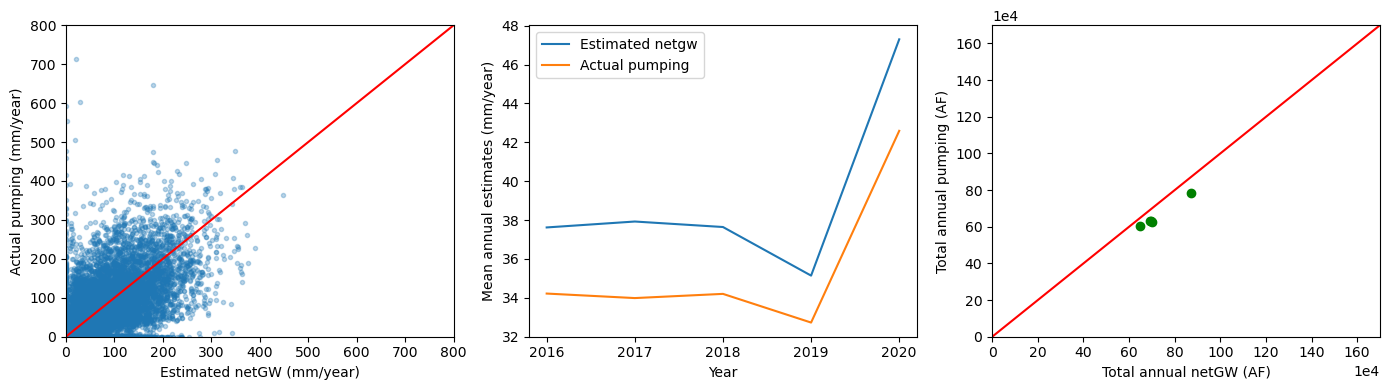

In [11]:
r2 = r2_score(rpb_df.pumping_mm, rpb_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(rpb_df.pumping_mm, rpb_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# scatter plot
ax[0].scatter(rpb_df.netGW_mm, rpb_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean in mm/year
ax[1].plot(yearly_df.year, (yearly_df.netGW_mm * area_2km_pixel/rpb_area), label='Estimated netgw')
ax[1].plot(yearly_df.year, (yearly_df.pumping_mm * area_2km_pixel/rpb_area), label='Actual pumping')
ax[1].set_xticks(yearly_df.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

# annual sum in AF 
ax[2].scatter(yearly_df.netGW_AF, yearly_df.pumping_AF, color='g')
ax[2].plot([0, 1], [0, 1], '-r', transform=ax[2].transAxes)
ax[2].set_ylabel('Total annual pumping (AF)')
ax[2].set_xlabel('Total annual netGW (AF)')
ax[2].set_xlim(0, 1700000)
ax[2].set_ylim(0, 1700000)
ax[2].ticklabel_format(style='sci', scilimits=(4, 4))

plt.tight_layout()

# Harquahala INA, Arizona

In [14]:
hqr_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harquahala_INA_AZ/AZ_Harquahala_INA_netGW_pumping_updated.csv')
hqr_df.head()

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm
0,2016,0.0,0.0,0.0,33.824265,-113.310795,0.0,0.000000
1,2016,0.0,0.0,0.0,33.804502,-113.370084,0.0,4.928915
2,2016,0.0,0.0,0.0,33.804502,-113.350321,0.0,0.003111
3,2016,0.0,0.0,0.0,33.804502,-113.330558,0.0,0.003108
4,2016,0.0,0.0,0.0,33.804502,-113.310795,0.0,0.000000


In [15]:
# yearly df
yearly_df = hqr_df.groupby('year').sum()
yearly_df = yearly_df.reset_index()
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm
0,2016,12908.192663,17308.201140,67483.3203,16373.375291,-55283.296358,50328.081119,18003.309543
1,2017,11732.395805,18406.971570,71767.3400,16373.375291,-55283.296358,45743.737138,18897.414968
2,2018,11960.012862,17739.284680,69164.0797,16373.375291,-55283.296358,46631.199415,18206.502227
3,2019,11572.804458,16191.933407,63131.0792,16373.375291,-55283.296358,45121.502383,18771.519193
4,2020,12385.952611,18639.860434,72675.3553,16406.725246,-55396.449049,48291.906820,20384.343563


Comparing pumping vs netGW
R2:  0.41001382983874535
RMSE:  136.87143310741348
Comparing pumping vs pumping from Majumdar et al. 2022
R2:  0.3454328664034344
RMSE:  98.83325845312493


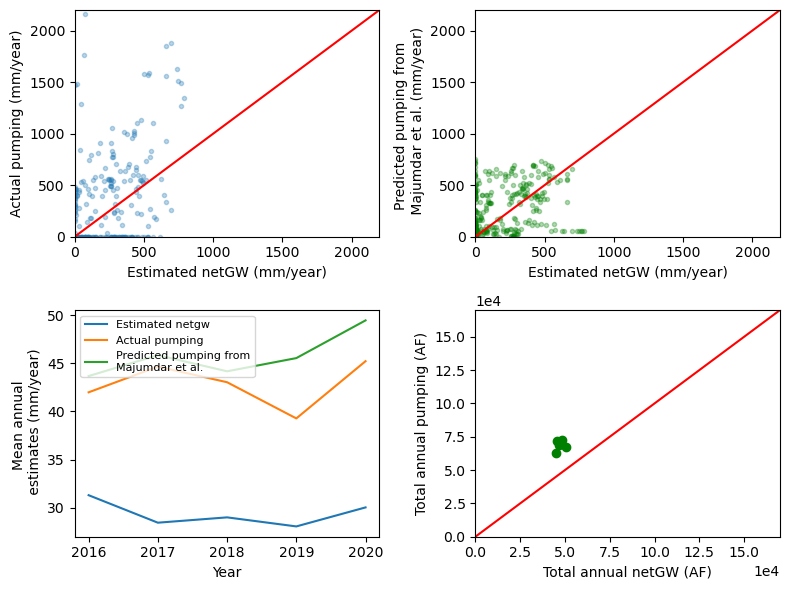

In [16]:
print('Comparing pumping vs netGW')
r2 = r2_score(hqr_df.pumping_mm, hqr_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(hqr_df.pumping_mm, hqr_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

print('Comparing pumping vs pumping from Majumdar et al. 2022')
r2 = r2_score(hqr_df.pumping_extracted_mm, hqr_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(y_true=hqr_df.pumping_extracted_mm, y_pred=hqr_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# scatter plot 1
ax[0, 0].scatter(hqr_df.netGW_mm, hqr_df.pumping_mm, alpha=0.3, marker='.')
ax[0, 0].set_ylabel('Actual pumping (mm/year)')
ax[0, 0].set_xlabel('Estimated netGW (mm/year)')
ax[0, 0].plot([0, 1], [0, 1], '-r', transform=ax[0, 0].transAxes)
ax[0, 0].set_xlim(0, 2200)
ax[0, 0].set_ylim(0, 2200)

# scatter plot 2
# pumping_extracted_mm is from Majumdar et al. 2022
ax[0, 1].scatter(hqr_df.netGW_mm, hqr_df.pumping_extracted_mm, alpha=0.3, marker='.', color='green')
ax[0, 1].set_ylabel('Predicted pumping from \n Majumdar et al. (mm/year)')
ax[0, 1].set_xlabel('Estimated netGW (mm/year)')
ax[0, 1].plot([0, 1], [0, 1], '-r', transform=ax[0, 1].transAxes)
ax[0, 1].set_xlim(0, 2200)
ax[0, 1].set_ylim(0, 2200)

# annual mean in mm/year
ax[1, 0].plot(yearly_df.year, (yearly_df.netGW_mm * area_2km_pixel/hqr_area), label='Estimated netgw')
ax[1, 0].plot(yearly_df.year, (yearly_df.pumping_mm * area_2km_pixel/hqr_area), label='Actual pumping')
ax[1, 0].plot(yearly_df.year, (yearly_df.pumping_extracted_mm * area_2km_pixel/hqr_area), label='Predicted pumping from' + '\n' + 'Majumdar et al.')
ax[1, 0].set_xticks(yearly_df.year)
ax[1, 0].set_ylabel('Mean annual \n estimates (mm/year)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].legend(loc='upper left', fontsize=8)

# annual sum in AF 
ax[1, 1].scatter(yearly_df.netGW_AF, yearly_df.pumping_AF, color='g')
ax[1, 1].plot([0, 1], [0, 1], '-r', transform=ax[1, 1].transAxes)
ax[1, 1].set_ylabel('Total annual pumping (AF)')
ax[1, 1].set_xlabel('Total annual netGW (AF)')
ax[1, 1].set_xlim(0, 170000)
ax[1, 1].set_ylim(0, 170000)
ax[1, 1].ticklabel_format(style='sci', scilimits=(4, 4))

plt.tight_layout()

In [17]:
yearly_df['efficiency'] =  yearly_df['netGW_mm']  / yearly_df['pumping_mm']
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm,efficiency
0,2016,12908.192663,17308.201140,67483.3203,16373.375291,-55283.296358,50328.081119,18003.309543,0.745785
1,2017,11732.395805,18406.971570,71767.3400,16373.375291,-55283.296358,45743.737138,18897.414968,0.637389
2,2018,11960.012862,17739.284680,69164.0797,16373.375291,-55283.296358,46631.199415,18206.502227,0.674211
3,2019,11572.804458,16191.933407,63131.0792,16373.375291,-55283.296358,45121.502383,18771.519193,0.714727
4,2020,12385.952611,18639.860434,72675.3553,16406.725246,-55396.449049,48291.906820,20384.343563,0.664487


# Douglas INA, Arizona

In [18]:
doug_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Douglas_INA_AZ/AZ_Douglas_INA_netGW_pumping_updated.csv')
doug_df.head()

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm
0,2016,0.0,0.0,0.0,31.867735,-109.773229,0.0,0.000050
1,2016,0.0,0.0,0.0,31.867735,-109.753466,0.0,0.000050
2,2016,0.0,0.0,0.0,31.867735,-109.733704,0.0,0.004044
3,2016,0.0,0.0,0.0,31.867735,-109.713941,0.0,0.004893
4,2016,0.0,0.0,0.0,31.867735,-109.694178,0.0,6.105873


In [19]:
# yearly df
yearly_df = doug_df.groupby('year').sum()
yearly_df = yearly_df.reset_index()
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm
0,2016,9679.040834,8363.943484,32610.360040,10514.306988,-36525.611741,37737.859108,14093.695087
1,2017,9941.190380,9138.680801,35631.000025,10545.799227,-36635.365208,38759.960801,14338.426064
2,2018,9474.274064,9309.604911,36297.420000,10514.306988,-36525.611741,36939.488739,14218.507203
3,2019,10231.504176,8948.269149,34888.600200,10514.306988,-36525.611741,39891.872434,15644.141710
4,2020,10731.657123,7589.396006,29590.460080,10545.799227,-36635.365208,41841.931459,14340.441932


Comparing pumping vs netGW
R2:  0.11541244047580723
RMSE:  84.00683590010895
Comparing pumping vs pumping from Majumdar et al. 2022
R2:  0.3454328664034344
RMSE:  99.83392232135847


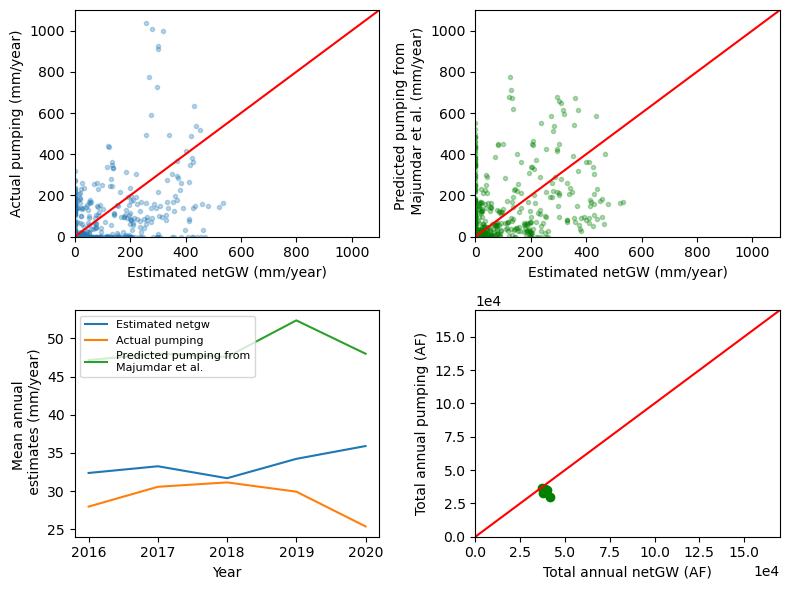

In [20]:
print('Comparing pumping vs netGW')
r2 = r2_score(doug_df.pumping_mm, doug_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(doug_df.pumping_mm, doug_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

print('Comparing pumping vs pumping from Majumdar et al. 2022')
r2 = r2_score(hqr_df.pumping_extracted_mm, hqr_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(y_true=doug_df.pumping_extracted_mm, y_pred=doug_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# scatter plot 1
ax[0, 0].scatter(doug_df.netGW_mm, doug_df.pumping_mm, alpha=0.3, marker='.')
ax[0, 0].set_ylabel('Actual pumping (mm/year)')
ax[0, 0].set_xlabel('Estimated netGW (mm/year)')
ax[0, 0].plot([0, 1], [0, 1], '-r', transform=ax[0, 0].transAxes)
ax[0, 0].set_xlim(0, 1100)
ax[0, 0].set_ylim(0, 1100)

# scatter plot 2
# pumping_extracted_mm is from Majumdar et al. 2022
ax[0, 1].scatter(doug_df.netGW_mm, doug_df.pumping_extracted_mm, alpha=0.3, marker='.', color='green')
ax[0, 1].set_ylabel('Predicted pumping from \n Majumdar et al. (mm/year)')
ax[0, 1].set_xlabel('Estimated netGW (mm/year)')
ax[0, 1].plot([0, 1], [0, 1], '-r', transform=ax[0, 1].transAxes)
ax[0, 1].set_xlim(0, 1100)
ax[0, 1].set_ylim(0, 1100)

# annual mean in mm/year
ax[1, 0].plot(yearly_df.year, (yearly_df.netGW_mm * area_2km_pixel/doug_area), label='Estimated netgw')
ax[1, 0].plot(yearly_df.year, (yearly_df.pumping_mm * area_2km_pixel/doug_area), label='Actual pumping')
ax[1, 0].plot(yearly_df.year, (yearly_df.pumping_extracted_mm * area_2km_pixel/doug_area), label='Predicted pumping from' + '\n' + 'Majumdar et al.')
ax[1, 0].set_xticks(yearly_df.year)
ax[1, 0].set_ylabel('Mean annual \n estimates (mm/year)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].legend(loc='upper left', fontsize=8)

# annual sum in AF 
ax[1, 1].scatter(yearly_df.netGW_AF, yearly_df.pumping_AF, color='g')
ax[1, 1].plot([0, 1], [0, 1], '-r', transform=ax[1, 1].transAxes)
ax[1, 1].set_ylabel('Total annual pumping (AF)')
ax[1, 1].set_xlabel('Total annual netGW (AF)')
ax[1, 1].set_xlim(0, 170000)
ax[1, 1].set_ylim(0, 170000)
ax[1, 1].ticklabel_format(style='sci', scilimits=(4, 4))

plt.tight_layout()

In [21]:
yearly_df['efficiency'] =  yearly_df['netGW_mm']  / yearly_df['pumping_mm']
yearly_df

,year,netGW_mm,pumping_mm,pumping_AF,lat,lon,netGW_AF,pumping_extracted_mm,efficiency
0,2016,9679.040834,8363.943484,32610.360040,10514.306988,-36525.611741,37737.859108,14093.695087,1.157234
1,2017,9941.190380,9138.680801,35631.000025,10545.799227,-36635.365208,38759.960801,14338.426064,1.087815
2,2018,9474.274064,9309.604911,36297.420000,10514.306988,-36525.611741,36939.488739,14218.507203,1.017688
3,2019,10231.504176,8948.269149,34888.600200,10514.306988,-36525.611741,39891.872434,15644.141710,1.143406
4,2020,10731.657123,7589.396006,29590.460080,10545.799227,-36635.365208,41841.931459,14340.441932,1.414033


# Diamod Valley, Nevada

In [22]:
dv_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Diamond_Valley_NV/NV_Diamond_Valley_netGW_pumping_annual.csv')
dv_df

,year,netGW_mm,netGW_AF,pumping_AF
0,2018,12388.369,48301.327300,46854.596518
1,2019,12568.103,49002.096495,44531.918956
2,2020,14938.402,58243.717575,59623.316935


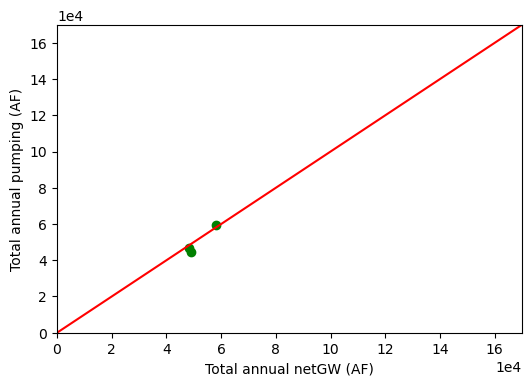

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(dv_df.netGW_AF, dv_df.pumping_AF, color='g')
ax.plot([0, 1], [0, 1], '-r', transform=ax.transAxes)
ax.set_ylabel('Total annual pumping (AF)')
ax.set_xlabel('Total annual netGW (AF)')
ax.set_xlim(0, 170000)
ax.set_ylim(0, 170000)
ax.ticklabel_format(style='sci', scilimits=(4, 4))